<a href="https://colab.research.google.com/github/pawan-cpu/MACHINE-LEARNING-MODEL/blob/main/IOT_DEVICES_TIME_SERIES_PLOTS_NasscomAIFC_Project_39_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  IoT Devices - Time Series Plots


### Context

IoT devices have been around for quite a while now. They are used to collect data through different kinds of sensors such as 
Motion sensors: These use a visual sensor to detect a change in apparent temperature of surroundings  or when someone comes in the field of view of a camera.
Heat sensors: These are used in trucks which carry perishable goods like fish and milk where changes in a temperature lower the shelf life of the produce. These are also used to detect forest fires.

Vibration sensors: These are used in car crash tests and detecting if someone is trying to cut a tree.  

A lot of people are using smartwatches and fitness watches to track their daily physical activities, calories burnt, average resting heart rates, sleep cycle so that they lead a fit life. Such wearables are equipped with laser sensors to collect data.

Heat Index (temperature + humidity ) is one common data recorded on these IoT readers. The frequency of the upcoming data is very fast. The sensor reads hundreds to millions of data per second. There is a huge and versatile application of this data in real-world like agriculture, weather forecasting, soil monitoring and treatment, enterprise maintenance etc.

Heat stress index of India.

<img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/heat_index_india.png' width=600>


---

### Problem Statement

Put yourself in the shoes of a quality analyst whose task is to test the efficacy of new IoT devices. You need to create time-series plots for daily temperature variation for the given duration and find any inconsistencies in the temperature readings (if there are any). 

In case the data collected through the device is correct, find the percentages of the yellow, orange and red zones. 

---

#### Getting Started

Follow the steps described below to solve the project:

1. Click on the link provided below to open the Colab file for this project.
   
   https://colab.research.google.com/drive/1Gm3Cur-AQsgB6vEgfNSSpmztRdYH-78x
2. Create the duplicate copy of the Colab file. Here are the steps to create the duplicate copy:

    - Click on the **File** menu. A new drop-down list will appear.

      <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/0_file_menu.png' width=500>

    - Click on the **Save a copy in Drive** option. A duplicate copy will get created. It will open up in the new tab on your web browser.

      <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/1_create_colab_duplicate_copy.png' width=500>

     - After creating the duplicate copy of the notebook, please rename it in the **YYYY-MM-DD_StudentName_CapstoneProject12** format. 

3. Now, write your code in the prescribed code cells.

---

### Data Description

This dataset contains the temperature readings from an IoT device installed outside and inside of an anonymous room (labelled as admin room) to test the device. The readings were taken between 11 January 2018 and 10 December 2018. Additionally, it was uninstalled or taken down quite frequently during the entire reading period. There are 5 columns and 97,605 rows in the dataset.

1. `id` - unique IDs for each reading

2. `room_id/id` - room id in which device was installed (inside and/or outside). In this dataset, only `Room Admin` label is used as a `room_id` for example purpose.

3. `noted_date` - date and time of reading

4. `temp` - temperature readings

5. `out/in` - whether the reading was taken from a device installed inside or outside of the room?

Here's the dataset link:

https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/iot-devices/IoT-device.csv

---

### Things To Do

- What is the trend in the variation in daily indoor and outdoor temperatures?

- What is the trend in the variation in monthly median indoor and outdoor temperatures?

- Find out the hottest and coldest month(s).

- Find the maximum and minimum temperatures recorded for each month.

- Find the hottest and coldest days for each month along with the temperatures.

---

#### 1. Import Modules & Load Dataset

In [ ]:
# Import the required modules and load the dataset.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset.
csv_file = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/iot-devices/IoT-device.csv'
df = pd.read_csv(csv_file)
df.head()

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In


In [ ]:
# Get the information on DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          97606 non-null  object
 1   room_id/id  97606 non-null  object
 2   noted_date  97606 non-null  object
 3   temp        97606 non-null  int64 
 4   out/in      97606 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.7+ MB


---

#### 2. Missing Values Check

Check for the null values in the DataFrame.

In [ ]:
# Check for the null values in the DataFrame.
df.isnull().sum()

id            0
room_id/id    0
noted_date    0
temp          0
out/in        0
dtype: int64

**Q:** Are there any columns in the DataFrame containing the missing values? If yes, then provide the column names.

**A:**No

---

#### 3. Drop Unnecessary Columns


Find out if there are unnecessary columns in the DataFrame. If there are any, then drop them from the DataFrame.

In [ ]:
# Find out if there are unnecessary columns in the DataFrame. If there are any, then drop them from the DataFrame. 
df.drop(columns=  ["id" , "room_id/id"], axis = 1 , inplace = True)

**Hint**: You can drop the columns using the `drop()` function.

---

#### 4. Get `datetime` Objects

Convert the values contained in the `noted_date` column into the `datetime` objects.

In [ ]:
# Convert the values contained in the 'noted_date' column into the 'datetime' objects.
df["noted_date"] = pd.to_datetime(df["noted_date"])
df["noted_date"].head()

0   2018-08-12 09:30:00
1   2018-08-12 09:30:00
2   2018-08-12 09:29:00
3   2018-08-12 09:29:00
4   2018-08-12 09:29:00
Name: noted_date, dtype: datetime64[ns]

In [ ]:
# Verify whether the conversion is successful or not.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   noted_date  97606 non-null  datetime64[ns]
 1   temp        97606 non-null  int64         
 2   out/in      97606 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.2+ MB


**Hint**: 

 - You can convert the values into `datetime` objects using the `to_datetime()` function of the `pandas` module. 

 - You can verify the same using the `info()` function.

---

#### 5. Sort The DataFrame

Sort the DataFrame in the chronological order.

In [ ]:
# Sort the DataFrame in the increasing order of dates and time.
df=df.sort_values(by='noted_date')
df.head(10)

,noted_date,temp,out/in
16218,2018-01-11 00:06:00,32,In
16217,2018-01-11 00:07:00,40,Out
16216,2018-01-11 00:09:00,39,Out
16215,2018-01-11 00:13:00,40,Out
16214,2018-01-11 00:23:00,40,Out
16213,2018-01-11 00:25:00,40,Out
16212,2018-01-11 00:31:00,41,Out
16211,2018-01-11 00:33:00,40,Out
16210,2018-01-11 00:37:00,39,Out
16209,2018-01-11 00:41:00,41,Out


**Hint**: You can sort the values by using the `sort_values()` function.

---

#### 6. Add More Features

Get the year, month, day, day name, hours and minutes values from the `datetime` values and create new columns for the same.

In [ ]:
# Create new columns for year, month, day, day name, hours and minutes values and add to the DataFrame.


df['Year'] = df["noted_date"].dt.year
df['Month'] = df["noted_date"].dt.month
df['Day'] = df["noted_date"].dt.day
df['Day Name'] = df["noted_date"].dt.day_name()
df["hours"]= df["noted_date"].dt.hour
df["minuutes"] = df["noted_date"].dt.minute

In [ ]:
# Display the first five rows of the DataFrame.
df.head()

,noted_date,temp,out/in,Year,Month,Day,Day Name,hours,minuutes
16218,2018-01-11 00:06:00,32,In,2018,1,11,Thursday,0,6
16217,2018-01-11 00:07:00,40,Out,2018,1,11,Thursday,0,7
16216,2018-01-11 00:09:00,39,Out,2018,1,11,Thursday,0,9
16215,2018-01-11 00:13:00,40,Out,2018,1,11,Thursday,0,13
16214,2018-01-11 00:23:00,40,Out,2018,1,11,Thursday,0,23


---

#### 7. Line Plots & Box Plots

Create line plots and box plots for the temperature recorded in the indoor and outdoor settings.

In [ ]:
# Create a DataFrame for the indoor temperature records using 'df[df['out/in'] == 'In']'.
in_temp_df=df[df['out/in'] == 'In']
in_temp_df

,noted_date,temp,out/in,Year,Month,Day,Day Name,hours,minuutes
16218,2018-01-11 00:06:00,32,In,2018,1,11,Thursday,0,6
16186,2018-01-11 02:12:00,32,In,2018,1,11,Thursday,2,12
16176,2018-01-11 02:44:00,32,In,2018,1,11,Thursday,2,44
16174,2018-01-11 02:46:00,32,In,2018,1,11,Thursday,2,46
16167,2018-01-11 02:58:00,31,In,2018,1,11,Thursday,2,58
...,...,...,...,...,...,...,...,...,...
50723,2018-12-10 20:25:00,35,In,2018,12,10,Monday,20,25
50721,2018-12-10 20:35:00,34,In,2018,12,10,Monday,20,35
50720,2018-12-10 20:37:00,35,In,2018,12,10,Monday,20,37
50706,2018-12-10 21:31:00,34,In,2018,12,10,Monday,21,31


**Hint**: You can create a DataFrame for the indoor temperature records by `df[df['out/in'] == 'In']` and storing it in a varibale (let's say `in_temp_df`).

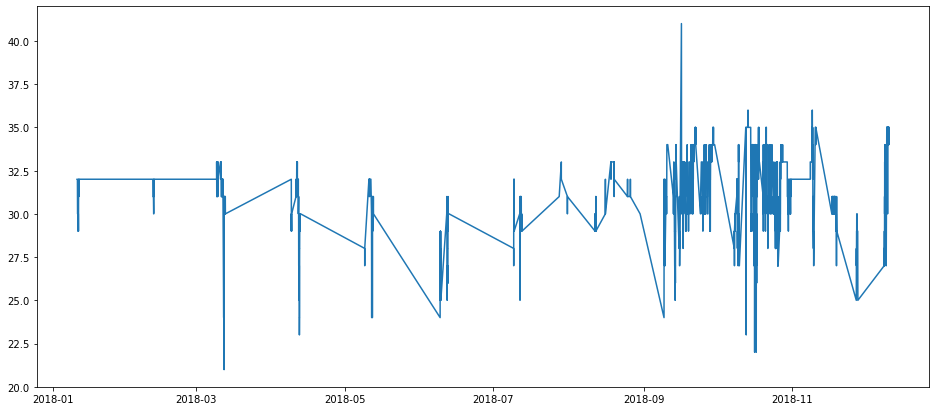

In [ ]:
# Create a time series line plot for the indoor temperature records.
plt.figure(figsize=(16,7))
plt.plot(in_temp_df['noted_date'],in_temp_df['temp'])
plt.show()

# pass the 'noted_date' and 'temp' columns of the indoor temperature Dataframe inside the plot() function. 


**Hint**: You can create a time series line plot for the indoor temperature records by passing the `noted_date` and `temp` columns of the `in_temp_df` (DataFrame for the indoor temperature records) as parameters inside the `plot()` function.

In [ ]:
# Create a DataFrame for the outdoor temperature records.
in_temp_df=df[df['out/in'] == 'out']
in_temp_df

In [ ]:
# Create a time series line plot for the outdoor temperature records.
plt.figure(figsize=(16,7))
plt.plot(in_temp_df['noted_date'],in_temp_df['temp'])
plt.show()

In [ ]:
# Compare the time series line plots for both the indoor and outdoor temperature records.
plt.style.use('seaborn-dark')
common_month_names=['March','April']
plt.figure(figsize=(18, 6))
plt.title("Comparing Monthly Median CO Concentrations in 2004 & 2005.")
plt.plot(group_2004_common_months['Month'], group_2004_common_months['PT08.S1(CO)'], 'yo-', label='2004') 
# The plot will be in red colour. The turning points will have filled circles.
plt.plot(group_2005_common_months['Month'], group_2005_common_months['PT08.S1(CO)'], 'go--', label='2005') 
# The plot will be in green colour. It will have hyphenated lines & filled circles at the turning points.
plt.ylabel('Sensor Response')
plt.xticks(ticks=group_2004_common_months['Month'], labels=common_month_names)
plt.legend()
plt.grid(True)
plt.show()

**Hint**: You can compare the time-series line plots by creating both the line plots for indoor and outdoor temperature records inside a single graph.

In [ ]:
# Create a box plot to represent the distribution of indoor and outdoor temperatures for the whole year.
plt.style.use("dark_background")
plt.figure(figsize=(18, 6))
sns.boxplot(x='Month', y='T', data=df , hue ="Year")
plt.show()

In [ ]:
# Create a box plot to represent the distribution of indoor and outdoor temperatures for the whole year.

# pass the 'out/in' and 'temp' columns inside the 'x' and 'y' attributes of the 'boxplot()' function.


**Hint**: You can achieve the above task by passing the `out/in`  column inside `x` and `temp` column inside `y` attributes of the `boxplot()` function

---

#### 8. Grouping, Aggregation & More Plots

Group the data by the indoor and outdoor temperatures. Also, get monthly mean, standard deviation, median, minimum and maximum values for both the indoor and outdoor groups.


In [ ]:
# Get the maximum and minimum temperatures for each day in each month.
df.agg(func={'indoor': ['min', 'max'], 'outdoor' : ['min', 'max'], 'groups' : 'count'})

In [ ]:
df.agg(func={'indoor': ['mean', 'std', 'median'], 'outdoor' : 'max', 'groups' : 'count'})

**Hints**:

- You can get the temperature for each day in each month by passing both `month` and `day` (columns) inside the `by` parameter (in square braces) of the `groupby()` function.

- You can get the maximum and minimum values from the output obtained through the `groupby()` function. To do so you can use the `agg()` function.

In [ ]:
# Create a bar plot for the monthly median indoor & outdoor temperatures in a single bar chart.
plt.figure(figsize=(15,5))
plt.bar(x=np.arange(0,10),height=group_2004_month.median()['T'],width=0.4)
plt.show()

**Hint**: You can use the `estimator` attribute of the `barplot()` function to plot the monthly median and the `hue` attribute to plot both indoor and outdoor temperatures in a single bar chart.

**Q:** Which months were the hottest and coldest months?

**A:** 

In [ ]:
# Create a line plot for the monthly median outdoor temperatures.


In [ ]:
# Compare the monthly median indoor and outdoor temperatures.


In [ ]:
# Create a bar plot for the monthly median indoor & outdoor temperatures in a single bar chart.


**Q:** Which months were the hottest and coldest months?

**A:** 

---

#### 9. Find the Hottest and Coldest days

Create box plots to represent the monthly distribution of indoor and outdoor temperatures.



In [ ]:
# Create a box plot to represent the monthly distribution of indoor and outdoor temperatures. Also label the x-axis with actual month names.


**Hint**: You can label the x-axis with actual month names by passing the list of months inside the `labels` attribute and `np.arrange(12)` inside the `ticks` attribute of the `xticks()` function.

#### 9.1 Compare the monthly median indoor and outdoor temperatures.

Group the data by the indoor and outdoor temperatures. Also, get monthly mean, standard deviation, median, minimum, and maximum values for both the indoor and outdoor groups.


In [ ]:
# Group the data to get the monthly median indoor and outdoor temperatures along with the max and minimum temperatures.


In [ ]:
# Create a line plot for the monthly median indoor temperatures.


In [ ]:
# Create a line plot for the monthly median outdoor temperatures.


In [ ]:
# Compare the monthly median indoor and outdoor temperatures.


#### 9.2 Get the hottest day and coldest day for each month along with their respective temperature.


In [ ]:
# Group the data to get the monthly median indoor and outdoor temperatures along with the max and minimum temperatures.


In [ ]:
# Get the hottest day for each month along with the temperature.


# Define a 'for' loop that iterates from 1 to 13 (months)

  # Create a Dataframe by using the 'get_group()' function in a 'for' loop to access values of each month
  
  # Locate the row with maximum temperature from the 'temp' column using the 'loc[]' function
  
  # Locate the day with maximum temperature from the 'day' column using the 'loc[]' function
  
  # Append the maximum day and temperature for each month in a list one by one
  


**Hint**: You can create an empty list (let's say `hottest_days[]`) and then append the day with maximum temperature for each month one by one using a `for` loop. 

You can locate the day with maximum temperature by using the `max()` function on top of the `loc[]` function.

In [ ]:
# Get the coldest day for each month along with the temperature.


---

### Submitting the Project

Follow the steps described below to submit the project.

1. After finishing the project, click on the **Share** button on the top right corner of the notebook. A new dialog box will appear.

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/2_share_button.png' width=500>

2. In the dialog box, click on the **Copy link** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/3_copy_link.png' width=500>


3. The link of the duplicate copy (named as **YYYY-MM-DD_StudentName_CapstoneProject12**) of the notebook will get copied 

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/4_copy_link_confirmation.png' width=500>

4. Go to your dashboard and click on the **My Projects** option.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/5_student_dashboard.png' width=800>

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/6_my_projects.png' width=800>

5. Click on the **View Project** button for the project you want to submit.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/7_view_project.png' width=800>

6. Click on the **Submit Project Here** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/8_submit_project.png' width=800>

7. Paste the link to the project file named as **YYYY-MM-DD_StudentName_CapstoneProject12** in the URL box and then click on the **Submit** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/9_enter_project_url.png' width=800>


---